# Homework 1

## *Jingheng Huan*
Netid: jh730

## 1) Bayesian statistics
**(2 point)** 

Suppose that we have three coloured boxes r (red), b (blue), and g (green).
Box r contains 3 apples, 4 oranges, and 3 limes, box b contains 1 apple, 1 orange,
and 0 limes, and box g contains 3 apples, 3 oranges, and 4 limes. 

**(a)** If a box is chosen
at random with probabilities p(r) = 0.2, p(b) = 0.2, p(g) = 0.6, and a piece of
fruit is removed from the box (with equal probability of selecting any of the items in
the box), then what is the probability of selecting an apple?

**(b)** If we observe that the
selected fruit is in fact an orange, what is the probability that it came from the green
box?

Explain your reasoning.

**ANSWER**

(a) The probability of choosing an apple from these three boxes is the sum of the probabilities of doing so from each box, weighted by the probabilities of choosing each box. Therefore, p = p(r) * 3/10 + p(b) * 1/2 + p(g) * 3/10 = (0.2 * 3/10) + (0.2 * 1/2) + (0.6 * 3/10) = 0.34 is the probability of choosing an apple.


In [34]:
# (a)
print((0.2 * (3/10)) + (0.2 * (1/2)) + ((0.6 * (3/10))))

0.33999999999999997


(b) We should apply `Bayes' theorem`, P(green box | orange) = P(orange | green box) * P(green box) / P(orange) = (3/10) * (0.6) / ( (4/10) * (0.2) + (1/2) * (0.2) + (3/10) * (0.6)) = 0.5, which is the probability that the orange came from the green box.

In [35]:
# (b)
print((3/10) * (0.6) / ( (4/10) * (0.2) + (1/2) * (0.2) + (3/10) * (0.6)))

0.5


## 2) Bias-variance tradeoff for the kNN classifier

**(5 points total)**


**(a)** use the scikit-learn function make_moons to create a dataset of 1000 random samples with the parameter noise=0.25. Scatterplot this dataset. *(0.5 points)*

**(b)** do a 0.5/0.5 train test split *(0.5 points)*

**(c)** Use the training dataset to train three k-Nearest Neighbor classifiers with $k = \{1, 20, 140\}$ *(1 point)*

**(d)** Create three plots showing the three decision boundaries together with the training data. Use 0.01 as mesh size. *(0.5 points)*

**(e)** Train a kNN classifier on your training set in a loop that sets k to 1,2,...140. Apply each of these trained classifiers to both your training dataset and your test dataset store the fraction of mislabeled datapoints (which is 1 - accuracy). 

After the loop, plot 1 - accuracy versus k using a logarithmic x-axis *(2 points)*. 


**(f)** Which k corresponds to the algorithm with the highest complexity? *(0.5 points)* 

**ANSWER**

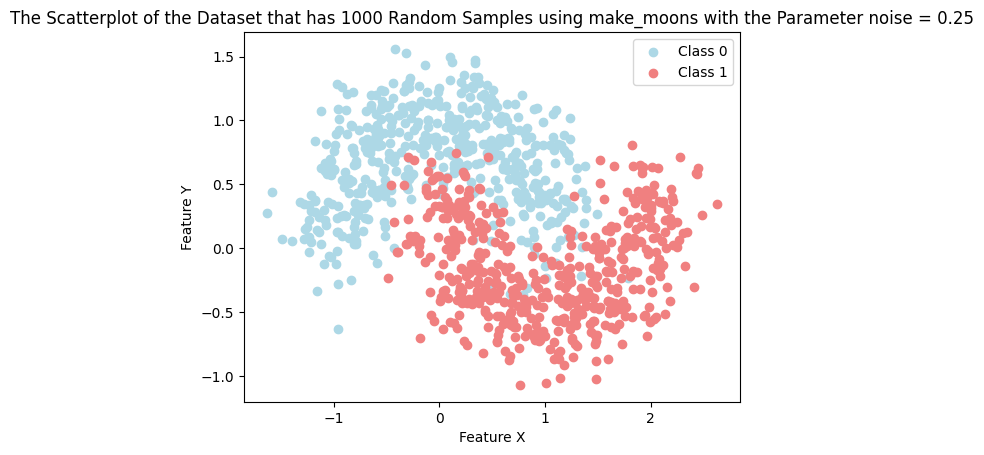

In [36]:
#(a)
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

# Create the dataset
X, y = make_moons(n_samples=1000, noise=0.25)

# Scatter plot the dataset
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='lightblue', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='lightcoral', label='Class 1')
plt.xlabel("Feature X")
plt.ylabel("Feature Y")
plt.title("The Scatterplot of the Dataset that has 1000 Random Samples using make_moons with the Parameter noise = 0.25")
plt.legend()
plt.show()



In [37]:
#(b)
from sklearn.model_selection import train_test_split

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)


In [38]:
#(c)
from sklearn.neighbors import KNeighborsClassifier

# Create a list of k values and an empty list to store the classifiers
k_values = [1, 20, 140]
classifiers = []

# Train a k-NN classifier for each k value
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    classifiers.append(knn)


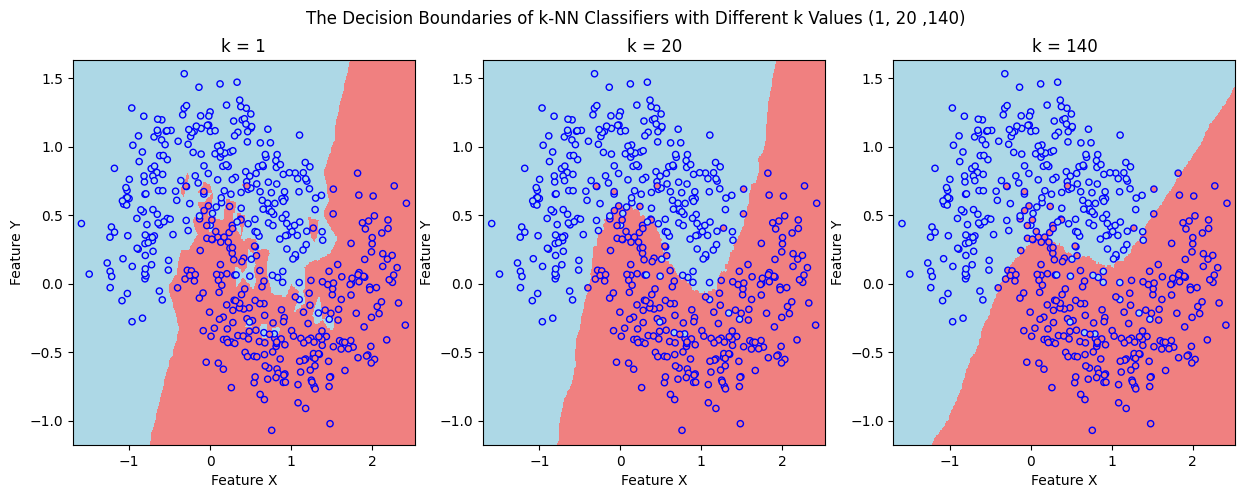

In [39]:
#(d)
from matplotlib.colors import ListedColormap
import numpy as np

# Set the mesh size
h = .01

# Create a color map for the points
cmap_light = ListedColormap(['#ADD8E6', '#F08080'])
cmap_bold = ListedColormap(['#ADD8E6', '#F08080'])

# Create a mesh grid
x_min, x_max = X_train[:, 0].min() - 0.1, X_train[:, 0].max() + 0.1
y_min, y_max = X_train[:, 1].min() - 0.1, X_train[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Create a figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(15,5))

# Iterate through the k values and classifiers
for k, knn, ax in zip(k_values, classifiers, axs.ravel()):
    # Predict the class labels of the mesh grid points
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

    # Plot the decision boundary
    Z = Z.reshape(xx.shape)
    ax.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold, edgecolor='blue', s=20)

    # Set the axis labels and the title
    ax.set_xlabel('Feature X')
    ax.set_ylabel('Feature Y')
    ax.set_title('k = {}'.format(k))

plt.suptitle("The Decision Boundaries of k-NN Classifiers with Different k Values (1, 20 ,140)")
plt.show()


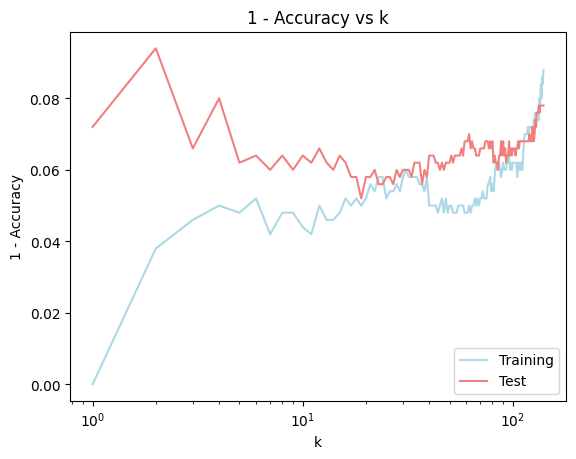

In [40]:
#(e)
from sklearn.metrics import accuracy_score

# Create an array of k values
k_values = np.arange(1, 141)

# Create arrays to store the accuracy scores
train_accuracy = np.empty(len(k_values))
test_accuracy = np.empty(len(k_values))

# Iterate through the k values
for i, k in enumerate(k_values):
    # Create a kNN classifier with the current k value
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    # Predict the class labels of the training and test sets
    y_pred_train = knn.predict(X_train)
    y_pred_test = knn.predict(X_test)
    
    # Compute the accuracy scores
    train_accuracy[i] = 1 - accuracy_score(y_train, y_pred_train)
    test_accuracy[i] = 1 - accuracy_score(y_test, y_pred_test)

# Plot the accuracy scores
plt.semilogx(k_values, train_accuracy, label='Training', color = 'lightblue')
plt.semilogx(k_values, test_accuracy, label='Test', color = 'lightcoral')
plt.xlabel('k')
plt.ylabel('1 - Accuracy')
plt.title('1 - Accuracy vs k')
plt.legend()
plt.show()


(f)
Since the `k-Nearest Neighbors algorithm` becomes more complex as the value of k is decreased, we know that when k is set to be 1, the model takes into account only the closest point to make a prediction, making it the most complex among all other k values. In contrast, if k is increasing, it depends on more points, which is less complex. Therefore, k=1 represents the highest complexity level in the kNN classifier.

## 3) Participate in the Kaggle Titanic Machine Learning Challenge
**(4.5 points total)**

[Kaggle](https://en.wikipedia.org/wiki/Kaggle) is a platform that hosts machine learning competitions, notebooks, and datasets. This exercise will get you started with participating in Kaggle competitions, a skill you will need in week four of this course. 

**(a)**  Create an account on Kaggle and sent me your username via email. Your username has to be either your real name, your netid, or a pseudonym you sent him via email _before_ you open the account. If you already have a Kaggle account, you probably will have trouble to open a second one $\rightarrow$ sent me an email. (0.5 points)

Then participate in the [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic/overview) competition. Download the test and training data from there.

[This video](https://www.youtube.com/watch?v=8yZMXCaFshs) can help you getting started. It's fine to get inspiration from existing notebooks. However, remember the copy fragments, not solutions policy. You need to write your Python code.  

**(b)**  Write a notebook that uses logistic regression, at least three different features, and 3 fold cross-validation. What is the accuracy? (1.5 points)

**(c)**  Use GridSearchCV to determine the best L2 regularization strength (switched on by default, hyperparameter: C ) Then make a prediction for the test data set. (1.5 points)

**(d)**  Make a submission of your test data prediction to the Titanic contest and document it with a screenshot of your position at the leaderboard. Your Ranking does not matter. Besides the notebook containing your code you need to submit that image to Sakai. (1 point)

**ANSWER**

In [41]:
#(b)
# import titanic dataset
import pandas as pd
gender_submission = pd.read_csv('titanic/gender_submission.csv')
train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')

gender_submission.head()



,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [42]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [44]:
#(b)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score

# Select the features and target variable
X = train[['Sex', 'Age', 'Pclass']]
y = train['Survived']

# Convert categorical variables to dummy variables
X = pd.get_dummies(X, columns=['Sex'])

# Fill missing values in age column with the mean
X['Age'].fillna(X['Age'].mean(), inplace=True)

# Create a logistic regression model
logreg = LogisticRegression()

# Perform 3-fold cross-validation
scores = cross_val_score(logreg, X, y, cv=3)

# Print the accuracy of the model
print("Accuracy: %0.2f" % scores.mean())




Accuracy: 0.78


In [45]:
#(c)
from sklearn.model_selection import GridSearchCV

# Select the features and target variable
X = train[['Sex', 'Age', 'Pclass']]
y = train['Survived']

# Convert categorical variables to dummy variables
X = pd.get_dummies(X, columns=['Sex'])

# Fill missing values in age column with the mean
X['Age'].fillna(X['Age'].mean(), inplace=True)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a dictionary of hyperparameters to search
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Create a logistic regression model
logreg = LogisticRegression(penalty='l2')

# Use GridSearchCV to find the best L2 regularization strength
grid_search = GridSearchCV(logreg, param_grid, cv=3)
grid_search.fit(X_train, y_train)

print("Best value of C: ", grid_search.best_params_)

# Make predictions on the test set using the best model
y_pred = grid_search.predict(X_test)

# Select the features
X_sub = test[['Sex', 'Age', 'Pclass']]

# Convert categorical variables to dummy variables
X_sub = pd.get_dummies(X_sub, columns=['Sex'])

# Fill missing values in age column with the mean
X_sub['Age'].fillna(X_sub['Age'].mean(), inplace=True)

# Make predictions on the test data
test_pred = grid_search.predict(X_sub)

#(d)

# Create a submission dataframe
submission = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': test_pred})

# Save the submission dataframe to a CSV file
submission.to_csv('submission.csv', index=False)


Best value of C:  {'C': 1}
